In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Fish.csv")

In [6]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
# Assuming 'Species' is the target variable and the rest are features
X = df.drop(columns=['Species'])  # Features
y = df['Species']  # Target variable

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(
    criterion='gini',          # 'gini' or 'entropy' for split quality
    max_depth=10,              # Limit tree depth to prevent overfitting
    min_samples_split=5,       # Minimum samples required to split a node
    min_samples_leaf=2,        # Minimum samples required at a leaf node
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.72
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.67      0.44      0.53         9
        Pike       1.00      1.00      1.00         3
       Roach       0.12      1.00      0.22         1
       Smelt       1.00      0.60      0.75         5
   Whitefish       1.00      0.33      0.50         3

    accuracy                           0.72        32
   macro avg       0.83      0.77      0.72        32
weighted avg       0.88      0.72      0.76        32



In [15]:
# Define parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],  # Try different depths
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4, 6]  # Minimum samples in a leaf node
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid, 
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy', 
                           n_jobs=-1,  # Use all CPU cores
                           verbose=1)

# Fit model
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Best Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Model Accuracy: 0.62
              precision    recall  f1-score   support

       Bream       0.91      1.00      0.95        10
      Parkki       0.50      1.00      0.67         1
       Perch       0.45      0.56      0.50         9
        Pike       1.00      0.33      0.50         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      0.60      0.75         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.62        32
   macro avg       0.55      0.50      0.48        32
weighted avg       0.68      0.62      0.62        32



c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("Fish.csv")

# Check dataset structure
print(df.head())

# Assuming 'Species' is the target variable and the rest are features
X = df.drop(columns=['Species'])  # Features
y = df['Species']  # Target variable

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for Random Forest tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1,  # Use all CPU cores
                           verbose=1)

# Fit model
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Best Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Model Accuracy: 0.78
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.70      0.78      0.74         9
        Pike       1.00      0.67      0.80         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.78        32
   macro avg       0.67      0.63      0.65        32
weighted avg       0.79      0.78      0.78        32



c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("Fish.csv")

# Check dataset structure
print(df.head())

# Assuming 'Species' is the target variable and the rest are features
X = df.drop(columns=['Species'])  # Features
y = df['Species']  # Target variable

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manually optimized Random Forest model
model = RandomForestClassifier(
    n_estimators=200,         # Number of trees (higher = better performance)
    max_depth=20,             # Limits tree depth to prevent overfitting
    min_samples_split=5,      # Minimum samples required to split
    min_samples_leaf=2,       # Minimum samples per leaf
    criterion='entropy',      # Splitting criterion
    random_state=42,
    n_jobs=-1                 # Use all CPU cores for faster training
)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
Model Accuracy: 0.78
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.64      0.78      0.70         9
        Pike       1.00      0.67      0.80         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.78        32
   macro avg       0.66      0.63      0.64        32
weighted avg       0.77      0.78      0.77        32



c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("Fish.csv")

# Check dataset structure
print(df.head())

# Assuming 'Species' is the target variable and the rest are features
X = df.drop(columns=['Species'])  # Features
y = df['Species']  # Target variable

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(
    multi_class='multinomial',  # Enable multiclass classification
    solver='lbfgs',             # Recommended solver for multiclass problems
    max_iter=500,               # Increase iterations for better convergence
    random_state=42,
)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
Model Accuracy: 0.88
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       1.00      1.00      1.00         1
       Perch       0.69      1.00      0.82         9
        Pike       1.00      1.00      1.00         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.88        32
   macro avg       0.67      0.71      0.69        32
weighted avg       0.79      0.88      0.82        32



c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\Documents\GitHub\AIDI-2004-Projects\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capit

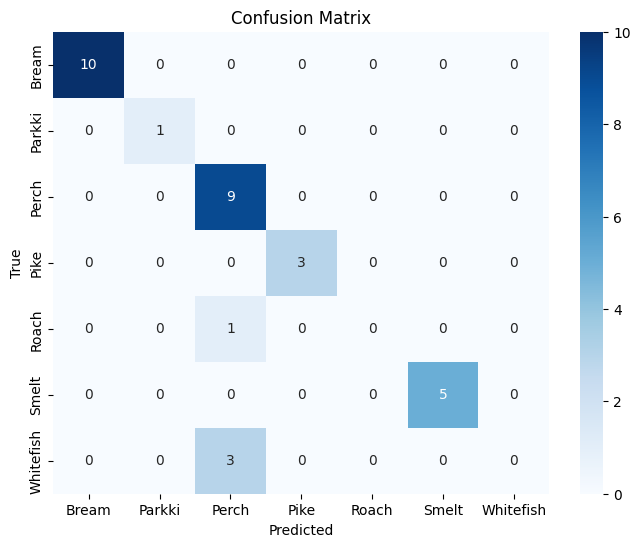

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()